# <center>**Binary16**</center>

**Alunos:** Elison Maiko, Italo Kusmin, Kamylo Porto, Lucas Barcaro. 
<br> **Disciplina:** Calculo Numérico

# **1 Introdução**
&emsp;&emsp;&emsp;O Sistema de Numeração Decimal é o sistema de numeração que nós usamos. Ele foi concebido pelos povos que moravam na atual Índia e divulgado no ocidente pelos árabes, por isso, é também chamado "sistema de numeração indo-arábico". É um sistema que utiliza base 10, ou seja, representada por dez dígitos (0, 1, 2, 3, 4, 5, 6, 7, 8 e 9), com os quais formamos infinitos números.<br>
&emsp;&emsp;&emsp;Já os computadores funcionam de maneira diferente, eles utilizam a base 2 (sistema binário), representada por 0 e 1. Isso acontece pois internamente, as máquinas interpretam os números 0 e 1, como nível lógico baixo (*LOW*) e alto (*HIGH*) de tensão. Esses zeros e uns são chamados de dígitos binários ou somente bit, que é a menor unidade de informação dos computadores (FERREIRA, 2023). Uma sequência de 8 bits formam 1 byte e uma sequência de bytes formam qualquer tipo de informação. <br>
&emsp;&emsp;&emsp;No entanto, como podemos imaginar, se as duas bases são diferentes, haverá, necessariamente, uma conversão entre bases. Para números inteiros, essa conversão é bastante simples. Sobretudo, o problema começa quando estamos trabalhando com números decimais, mais conhecidos como números float. <br>
&emsp;&emsp;&emsp;Alguns desses números float podem ser representados pelo que é chamado de ponto fixo, quando ocorre apenas um deslocamento da vírgula separadora da parte inteira e da mantissa do número. Entretanto, nos casos em que a fração possui um divisor diferente de uma combinação dos primos da base (2 e 5 para base 10 e apenas 2 para a base 2) criam dízimas periódicas. Alguns números da base 10, como por exemplo o número 0.1 podem ser representados por números múltiplos de 2 e 5, no caso, $2^{-1} \cdot 5^{-1}$, sem precisar de somas infinitas. O oposto também ocorre: o número 13 não é possível escrever usando apenas 2 e 5. O mesmo vale para a base binária, porém de forma mais simplificada pois ou é divisível por alguma potência de 2 ou é dízima periódica. Graças a isso, em algum momento foi necessário ter que arredondar os números reais que queremos armazenar. A dificuldade está em decidir quanta informação precisamos armazenar e a forma e a forma deste armazenamento para garantir que os computadores sejam úteis resolvendo problemas reais. Uma das soluções encontradas foi o uso de números em ponto flutuante.<br>
&emsp;&emsp;&emsp;Esses números de pontos flutuantes podem ocupar diversos tamanhos na memória, quanto mais espaço na memória, ou seja, mais bytes designados para tal, maior a precisão daquele número. Tudo vai depender da necessidade da aplicação, por exemplo, em uma missão espacial, a precisão dos cálculos são extremamentes importantes, pois qualquer arredondamento pode causar um grande estrago.
<br>&emsp;&emsp;&emsp;O objetivo deste trabalho é tratar sobre os números decimais armazenados em 16 bits da memória, também conhecidos como números de ponto flutuante de meia precisão. Abordaremos quais aplicações eles são mais indicados e traremos uma utilização prática no armazenamento de imagem.


# **2 Desenvolvimento**
&emsp;&emsp;&emsp;Em meio ao cenário de constante evolução computacional, surgiu a necessidade de processar números reais de forma cada vez mais eficiente, assim surgiram vários formatos numéricos, entre eles o ponto flutuante. Um ponto flutuante é capaz de representar um número real com precisão relativamente alta utilizando uma mantissa e um expoente de base 2, desde números muito pequenos a extremamente grandes conforme a precisão escolhida no formato.<br>
&emsp;&emsp;&emsp;Um ponto flutuante pode ter diversos formatos: ponto flutuante de meia precisão (16 bits sendo 1 de sinal, 5 para o expoente e 10 para a mantissa), ponto flutuante de precisão simples (32 bits, sendo 1 de sinal, 8 para o expoente e 23 para a mantissa), ponto flutuante de dupla precisão (64 bits, sendo 1 de sinal, 11 para o expoente e 52 para a mantissa), entre outros. Logicamente, quanto maior a precisão do formato maior a precisão decimal, sendo a parte da mantissa a o que define a precisão dos números em si e o expoente a precisão da ordem de grandeza. Por outro lado, também demanda uma maior capacidade de armazenamento, um fato que pode ser custoso dependendo da finalidade desejada. Portanto, deve-se ponderar o melhor tipo de ponto flutuante para cada caso, balanceando o nível de precisão necessário com a capacidade de armazenamento a ser gasta.<br>
&emsp;&emsp;&emsp;O ponto flutuante de meia precisão, também conhecido como *Binary16*  especialmente utilizado em dispositivos com recursos limitados e para o tratamento de imagem. Apesar de algumas limitações, o *Binary16* é suficiente para aplicações como renderização de imagens, processamento de sinais e redes neurais de baixa complexidade. Além disso, esse formato permite uma otimização do hardware, resultando em dispositivos mais compactos com melhor desempenho devido a maior velocidade de processamento e menor uso da memória, um exemplo bom é a presença do Binary16 em arduinos e conversores de sinais.

## **2.1 Funcionamento**
O formato Binary16 usa 1 bit para para o **sinal**, 5 bits para o **expoente** (base 2) e 10 bits para **mantissa**.

<center><img src="Imagem01.png\"/> <center>

&emsp;&emsp; **Sinal:** representado pelo primeiro bit, se o numero é positivo o bit de sinal é igual a 0, caso seja negativo o bit de sinal indica o valor 1.<br><br>
&emsp;&emsp; **Expoente:** É composto por 5 bits, permitindo um total de 32 valores diferentes ($2^5$). O menor valor possível para o expoente é $-14$ ($00001_2$) e o maior valor é $15$ ($11110_2$). O expoente é calculado pelo valor real do expoente (a exemplo, 3) menos um bit para poder representar negativos mesmo com valores positivos de 15, ficando 3 - 15 = -12. Além disso, o valor do expoente $00000$ e $11111$ são reservados para valores especiais como zero, infinito, e NaN (Not a Number).<br><br>
&emsp;&emsp; **Mantissa:** Representada por 10 bits, é a parte fracionária do número, sendo normalizada de forma que um dígito implícito sempre seja igual a 1. Isso permite a mantissa representar números na faixa de 1 a 2 com uma precisão de $2^{-10}$, aproximadamente(0.00098).


### **2.2 Limitações**
&emsp;&emsp;&emsp;O *Binary16* assim como as outras formas de representação apresenta limitações quanto a precisão e capacidade, entre elas: <br><br>
**- Baixa precisão:** Como já citado anteriormente, esse formato possui 10 bits de mantissa, o que nos entrega uma precisão de 3 a casas decimais após a vírgula. Isso pode ser insuficiente em aplicações que não requerem maior precisão, como é o caso de cálculos financeiros.<br><br>
**- Faixa de números representados:** É capaz de representar números de aproximadamente $6.1 \cdot 10^{-5}$ até $6.5\cdot10^4$, números acima ou abaixo desse intervalo não são representados.<br><br>
**- Perda de precisão:** Em alguns casos as operações matemáticas podem gerar perda de precisão. Erros de arredondamento ou truncamento acabam afetando os resultados.

### **2.3 Função para represetar decimal em Binary16**

In [132]:
import struct
import numpy as np

In [133]:
def float_para_bit(f):
    
    f = np.half(f)

    s = struct.pack('>e', f)
    return s

In [134]:
def extrai_sinal(numero):
    
    numero = float_para_bit(numero)
    
    sinal = numero[0]
    
    sinal = sinal >> 7
    
    return sinal

def extrai_expoente(numero):
    numero = float_para_bit(numero)
    
    expoente = numero[0]
    
    expoente = expoente << 1
    
    expoente = expoente >> 3
    
    return expoente

def extrai_mantissa(numero):
    numero = float_para_bit(numero)
    
    mantissa = numero[0]
    
    mantissa = mantissa << 6
    
    mantissa2 = numero[1]
    
    mantissa = mantissa << 2
    mantissa += mantissa2
    
    inter = mantissa >> 10
    inter = inter << 10
    
    mantissa -= inter
    
    return mantissa

In [135]:
def junta_final(numero):
    lista = {"Sinal":bin(extrai_sinal(float(numero))), \
             "Expoente": bin(extrai_expoente(float(numero))), \
             "Mantissa": bin(extrai_mantissa(float(numero)))}
    return lista

def printa_numero (numero):
    num = junta_final(numero)
    print(num['Sinal'][2:], end="")
    print(f" {num['Expoente'][2:]:0>5}", end="")
    print(f" {num['Mantissa'][2:]:0>10}")

In [136]:
x = float(input("Insira um número para ser representado em binary16: "))
printa_numero(x)

0 01110 1111010111


### **2.4 Trabalhando com imagem em Binary16**

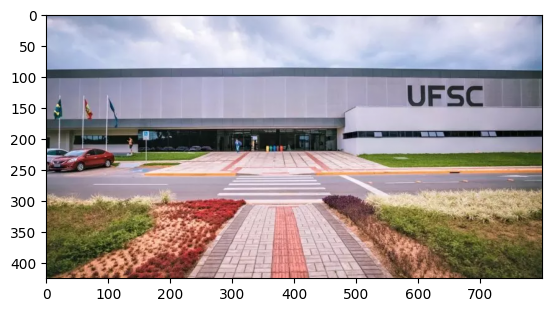

In [137]:
import matplotlib.pyplot as plt
import matplotlib.image as im

image = np.load('ufsc_j.npy')
imagefp_16 = np.load('ufsc_j.npy')
imagefp_64 = np.load('ufsc_j.npy')
image_diferenca = np.load('ufsc_j.npy')
image_diferenca_3000 = np.load('ufsc_j.npy')

plt.imshow(image)
plt.show()

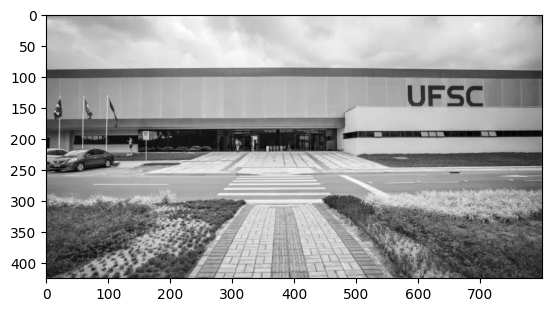

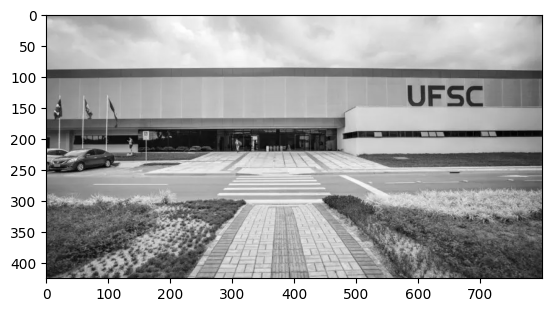

In [138]:
for a in range(0, len(imagefp_16)):
    for b in range(0, len(imagefp_16[a])):  # Trabalha a imagem como se fosse uma matriz

        media_cores = sum(imagefp_16[a, b])/3   # Calcula a média de cores do pixel

        imagefp_16[a, b] = np.half(media_cores) # Converte a media em Binary16 e armazena em um array
        imagefp_64[a, b] = media_cores          # Armazena a media em um array

im.imsave('image_fp16.jpg', imagefp_16)  # Salva a imagem binary16
im.imsave('image_fp64.jpg', imagefp_64)  # Salva a imagem binary64

plt.imshow(imagefp_16)
plt.show()

plt.imshow(imagefp_64)
plt.show()

&emsp;&emsp;&emsp;Visualizamos que as imagens são muito parecidas. Entretanto, sabemos que a imagem em Binary16 foi arredonda em algum momento, pois ela era, inicialmente, uma imagem em 64 bits. Então, com intuito de averiguar essa diferença, foi calculado a diferença em cada pixel e então exibida essa diferença como cada pixel de uma terceira imagem.<br>
&emsp;&emsp;&emsp;Simultaneamente, foi sendo comparada e armazenada a maior diferença observada e apresentado esse valor entre 0 e 255, pois é dessa forma que as imagens são trabalhadas.

Maior diferença:  0.06217447916667618


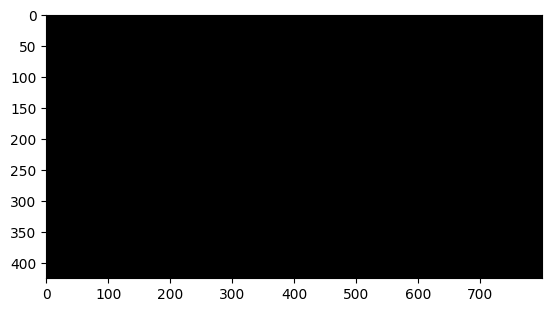

In [139]:
maior_diferenca = 0     # Inicia a variável que armazenará a maior diferença ente pixels
for a in range(0, len(image)):
    for b in range(0, len(image[a])):   # Trabalha a imagem como se fosse uma matriz

        media_cores_16 = sum(imagefp_16[a, b]) / 3      # Calcula a média de cores da imagem em fp16
        media_cores_64 = sum(imagefp_64[a, b]) / 3      # Calcula a média de cores da imagem em fp64

        diferenca = abs(media_cores_64 - media_cores_16)    # Calcula o módulo da diferença 

        if diferenca > maior_diferenca:     # Compara se a atual diferença é a maior
            maior_diferenca = diferenca

        image_diferenca[a, b] = diferenca   # Adiciona a diferenca em um array

im.imsave('diferenca.jpg', image_diferenca)  # Salva a imagem diferença

print("Maior diferença: ", maior_diferenca*255)
plt.imshow(image_diferenca)
plt.show()

&emsp;&emsp;&emsp;A diferença acontece apenas onde houve truncamento, logo ela seria de $2^{-32}$ (truncou o expoente) ou na décima casa decimal (truncou a mantissa). <br>
&emsp;&emsp;&emsp;Para observar essa diferença, foi calculado o pixel na qual houve a maior diferença entre a imagem em Binary16 e Binary62. Essa diferença, que deve ser ente 0 e 255, é de apenas ≈ 0.062, ou seja, quando a imagem é apresentada, o pixel é aredondado para 0, sendo apresentada uma imagem completamente preta. <br>
&emsp;&emsp;&emsp;Por conta disso, foi feito realizada uma multiplicação de 3000 vezes em cada pixel, para que essa diferença fosse perceptível. 

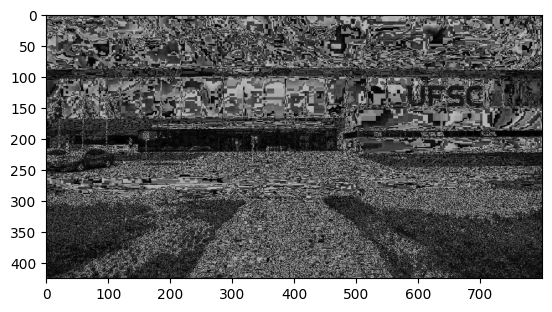

In [140]:
for a in range(0, len(image)):
    for b in range(0, len(image[a])):  # Trabalha a imagem como se fosse uma matriz

        diferenca_3000 = image_diferenca[a,b]*3000      # Amplia a diferença em x1000

        image_diferenca_3000[a, b] = diferenca_3000     # Armazena a diferenca em um array

im.imsave('diferenca_3000.jpg', image_diferenca)  # Salva a imagem diferença

plt.imshow(image_diferenca_3000)
plt.show()

&emsp;&emsp;&emsp;Apenas dessa maneira, com a diferença ampliada em 3000 vezes, conseguimos perceber os problemas de arredondamento.

# **3 Conclusão**


&emsp;&emsp;&emsp;É notória a importância do ponto flutuante de meia precisão na computação moderna, para algumas aplicações, como o armazenamento de imagens e processamento de inteligência artificial, é um formato menos custoso em termos de espaço e velocidade de processamento quando comparado a precisão simples (32 bits) e a dupla (64 bits). Apesar das limitações citadas, seu uso é amplo em diversos dispositivos com capacidades limitadas, sendo eficiente em uma representação numérica precisa onde a exatidão decimal mais precisa não é tão necessária, e sim fatores como o menor uso de armazenamento e maior desempenho são visados. <br>
&emsp;&emsp;&emsp;Além disso, quado aplicado para armazenamento de imagem, a diferença entre o arquivo em meia precisão e precisão dupla é muito pequena, no exemplo do capítulo 2.4, essa diferença foi tão pequena que, quando transformada para imagem, foi nula. Desse modo, observa-se que a aplicação e os recursos disponíveis são os principais fatores que devem ser considerados para optar por utilizar Binary16.

# **4 Referências**

ALCANTARA, Frank de. Removendo um pouco da sujeira sobre os pontos flutuantes. Disponível em: https://frankalcantara.com/pontos-flutuantes/. Acesso em: 07 abr. 2023.

ALTUS. CP Nexto - Representação e operação com ponto fixo e flutuante. Disponível em: https://www.altus.com.br/base-conhecimento/categoria/19/detalhe/409/cp-nexto---representacao-e-operacao-com-ponto-fixo-e-flutuante. Acesso em: 07 abr. 2023.

FERREIRA, Silvio. Sistema binário – Parte I. Disponível em: http://www.linhadecodigo.com.br/artigo/1648/sistema-binario-parte-i.aspx. Acesso em: 07 abr. 2023.

GCFGLOBAL (org.). Código Binário. Disponível em: https://edu.gcfglobal.org/pt/informatica-avancada/codigo-binario/1/. Acesso em: 07 abr. 2023.

TURSA, James. IEEE 754r Half Precision floating point converter (https://www.mathworks.com/matlabcentral/fileexchange/23173-ieee-754r-half-precision-floating-point-converter), MATLAB Central File Exchange. Acesso em: 07 abr. 2023.

PYTHON SOFTWARE FOUNDATION (org.). Floating Point Arithmetic: Issues and Limitations. Disponível em: https://docs.python.org/3/tutorial/floatingpoint.html. Acesso em: 07 abr. 2023.

WIKIPEDIA (org.). Half-precision floating-point format. Disponível em: https://en.wikipedia.org/wiki/Half-precision_floating-point_format. Acesso em: 07 abr. 2023.

WILL, Prof. Me. Newton Carlos. Ponto Fixo e Ponto Flutuante: arquitetura de computadores. Arquitetura de Computadores. Disponível em: http://www.cpgg.ufba.br/pessoal/reynam/Curso_HPC_2016_1/3-Ponto_Fixo_e_Ponto_Flutuante.pdf. Acesso em: 07 abr. 2023.
